In [1]:
import torch
import matplotlib.pyplot as plt
from model import LitResnet

In [2]:
def norm_ip(img, min, max):
    img.clamp_(min=min, max=max)
    img.add_(-min).div_(max - min + 1e-5).mul_(255)

def to_img(tensor):
    return tensor.permute(0, 2, 3, 1).to('cpu', torch.uint8).numpy()

def get_first_kernels(model):
    filters = model.model.conv1.weight.data
    norm_ip(filters, float(filters.min()), float(filters.max()))
    filters = to_img(filters)
    return filters

In [3]:
resnet_7x7 = LitResnet.load_from_checkpoint(
    'lightning_logs/base_7x7_narrow/version_0/checkpoints/epoch=39-step=12519.ckpt')

resnet_7x7_hamming = LitResnet.load_from_checkpoint(
    'lightning_logs/base_7x7_hamming_narrow/version_0/checkpoints/epoch=39-step=12519.ckpt')

In [4]:
filters_7x7 = get_first_kernels(resnet_7x7)
filters_7x7_hamming = get_first_kernels(resnet_7x7_hamming)

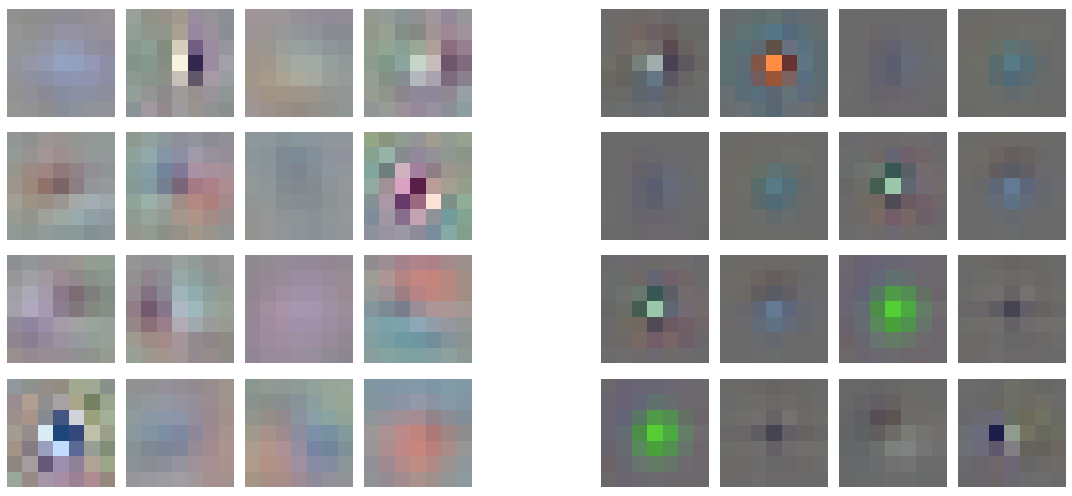

In [5]:
n_rows, n_cols = 4, 9
f, ax = plt.subplots(n_rows, n_cols, figsize=(15, 7))

for row in range(n_rows):
    for col in range(n_cols):
        if col < 4:
            ax[row, col].imshow(filters_7x7[row * (n_cols // 2) + col])
        elif col > 4:
            ax[row, col].imshow(filters_7x7_hamming[row * ((n_cols - 5) // 2) + col])
        ax[row, col].axis('off')

plt.tight_layout()